<a href="https://colab.research.google.com/github/royssentongo/INN-Hotels_Booking-Predicting_Model/blob/main/Project_SLC_DSBA_INNHotels_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

#### Importing necessary Libraries

In [ ]:
# Importing necessary libraries

# Manipulating data
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Splitting the data
from sklearn.model_selection import train_test_split

# Building and Evaluating models
# For building Logistic Regression Model
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Getting metric scores
from sklearn import metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, roc_curve
                             , precision_score, recall_score, f1_score, make_scorer
                             ,ConfusionMatrixDisplay, precision_recall_curve)

# For building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image

# To tune different models
from sklearn.model_selection import GridSearchCV

# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

## Data Overview

- Observations
- Sanity checks

#### Loading the data

In [ ]:
# Loading the data into colab
from google.colab import files
import io
try:
  uploaded
except NameError:
  uploaded = files.upload()
hotel_data = pd.read_csv(io.BytesIO(uploaded['INNHotelsGroup.csv']))

Saving INNHotelsGroup.csv to INNHotelsGroup.csv


In [ ]:
# creating a copy of the data
data = hotel_data.copy()

#### Viewing the Data

In [ ]:
# Checking the top 5 rows
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [ ]:
# Checking the last 5 rows
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


###### Observation:
All the data under each column looks appropriate. The first column is indeed a unique identifier column

In [ ]:
# Checking the shape of the data
data.shape

(36275, 19)

###### Observation
There are 19 columns and 36,275 rows

In [ ]:
# Checking the data types and other information of each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

###### Observation
1) All columns don't have null values.

2) There are 13 columns with integers, 1 with float numbers and 5 with strings.

3) The data frame is using 5.3+ MB of Memory Storage.

###### Insights
1) Convert the object columns to be categorical values.

2) Verify that 'Booking ID' is a unique identifier column.

3) Check whether there are no junk entries that are not in line with the expected values.

##### Observation
'Booking_ID' has 36,275 unique values thus doesn't add any value in terms of information.

##### Insight.
'Booking_ID' needs to be dropped.

In [ ]:

# checking the unique values of each column
col_names = data.columns
for col in col_names:
  print(f'{col}: {data[col].unique()}')

Booking_ID: ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
no_of_adults: [2 1 3 0 4]
no_of_children: [ 0  2  1  3 10  9]
no_of_weekend_nights: [1 2 0 4 3 6 5 7]
no_of_week_nights: [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
type_of_meal_plan: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
required_car_parking_space: [0 1]
room_type_reserved: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
lead_time: [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 147  87 

###### Observation
There are no junk entries in the data.

In [ ]:
# Checking for missing values
data.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


###### Observation
There are no missing values in the data.

In [ ]:
# Checking for duplicates
data.duplicated().sum()

0

In [ ]:
# Percentage of duplicate rows
data.duplicated().sum()/data.shape[0]*100

0.0

In [ ]:
# Dropping all duplicate values
data.drop_duplicates(inplace=True)

In [ ]:
# viewing the duplicate rows
data[data.duplicated()]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
# Dropping 'Booking ID' column
data.drop('Booking_ID', axis=1, inplace=True)

##### Data Summary

In [ ]:
# Getting the summary of the numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


##### Observation
1) The mean number of adults was 1.89 with a maximum of 4 and a minimum of 0. 75% of the time, 2 or more adults booked for a room.

2) The mean number of children was 0.14 with a maximum of 10 and a minimum of 0. 75% of the time, no children were booked in for a room.

3) The mean no_of_weekend_nights was 0.88 with a maximum of 7 nights and a minumum of 0 nights. Atleast 1 weekend night was booked for 50% of the time.

4) The mean no_of_week_nights was 2.26 with a maximum of 17 nights and a minumum of 0 nights. Atleast 1 weekend night was booked for 75% of the time.

5) The mean required car parking space was 0.04 with a maximum of 1 and a minimum of 0. 75% of the time, there wasn't a requirement for car parking space by the clients booking.

6) The average Lead Time was ~66.5 days with a minimum of 0 days and a maximum of 443 days. 50% of the time, clients planned to arrive within 44 days of Booking the room.

7) 75% of the planned arrival dates were in the year 2018. Also, 50% of the planned arrival dates were between August and December.

8) 75% of the time, the customer was not a repeat guests.

9) On average, the number of previous cancellations was 0.028 with a minimum of 0 and a maximum of 13. 75% of the time, there was no previous cancellation of a booking by a customer.

10) On average, 0.2 previous bookings had not canceled by a customer with a minimum of 0 and maximum of 58. 75% of the time, a customer had not previously cancelled their booking.

11) The average room price was 105.7 Euros with a maximum of 540 Euros and a minimum of 0 Euros.

12) The average number of special requests was 0.74 with a minimum of 0 and maximum of 5. 50% of the time, not more than 1 special request was made.

##### Converting 'required_car_parking_space', 'repeated_guest', 'arrival_year' and 'arrival_month' to categorical variables.

Insight: This is because even when these variables are numerical, they make more sense as Categorical variables given their discrete data.

In [ ]:
col_names = ['required_car_parking_space', 'repeated_guest','arrival_year','arrival_month']
for feature in col_names:
  data[feature] = pd.Categorical(data[feature])

In [ ]:
# Getting the summary of the Object/ Categorical variables
data.describe(include=['object', 'category']).T

,count,unique,top,freq
type_of_meal_plan,36275,4,Meal Plan 1,27835
required_car_parking_space,36275,2,0,35151
room_type_reserved,36275,7,Room_Type 1,28130
arrival_year,36275,2,2018,29761
arrival_month,36275,12,10,5317
market_segment_type,36275,5,Online,23214
repeated_guest,36275,2,0,35345
booking_status,36275,2,Not_Canceled,24390


##### Observation
1) The most common meal plan was Breakfast only. There were 4 unique meal plans available.

2) The most preferred room type was Room_Type 1. There were 7 unique Room Types available.

3) There were 5 types of market segments with Online being the most frequent with 20,019 bookings.

4) Not_canceled was the most frequent Booking_status  with 18,558 occurrences.

5) Majority of the bookings did not require for a car parking space.

6) Majority of the customers booking were to be new guests.

7) Overall, the highest number of booking was experienced in the month of October with 2018 the year with most bookings overall.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

In [ ]:
# User-defined function for plotting a histogram and box plot
def hist_box_plot (column_name):
    # Creating the plot area for the sub-plots
    fig, ax = plt.subplots(1,2, figsize = (12,4))

    #plotting the histogram
    sns.histplot(x = data[column_name],kde = True, ax = ax[0])
    # Adding a title
    ax[0].set_title(column_name + ' Histogram')
    #plotting the box plot
    sns.boxplot(x = data[column_name], ax = ax[1])
    # Add marker for the mean
    mean_screen_size = data[column_name].mean()
    ax[1].plot(mean_screen_size, 0, 'ro', markersize=3, label='Mean')
    ax[1].legend()
    # Adding a title
    ax[1].set_title(column_name +' Box Plot')
    plt.tight_layout()

In [ ]:
# User- defined function for ploting Bar plot with percentages on each bar.
def labeled_barplot(data, column_name, fig_height, perc=True, n=None):
    """
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    #Defining the count and Total to compute percentage:
    # length of the column
    total = len(data[column_name])
    # number of the unique values in the variable
    count = data[column_name].nunique()
    # Setting the plot size based on number of unique values to plot.
    if n is None:
        plt.figure(figsize=(count + 2, fig_height))
    else:
        plt.figure(figsize=(n + 2, fig_height))
    # Setting the x-axis characteristics for better visual
    plt.xticks(rotation=60, fontsize=8)
    # Plotting the bar plot in descending order:
    order = data[column_name].value_counts().index
    if n is not None:
        order = order[:n]  # Slice after sorting if n is provided
    ax = sns.countplot(data=data, x=column_name, order=order if column_name != 'arrival_month' else None)

    # Adding a title
    ax.set_title(column_name + ' Bar plot')

    # Calculating the percentages
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        # width of the plot
        x = p.get_x() + p.get_width() / 2
        # height of the plot
        y = p.get_height()

        # annotate the percentage
        ax.annotate(label,(x, y), ha="center", va="center", size=8, xytext=(0, 5), textcoords="offset points",)

    plt.tight_layout()

    # Adjust plot parameters to add spacing
    plt.subplots_adjust(bottom=0.2)  # Increase bottom margin

    plt.show()  # show the plot

#### Histogram and Box Plot for Each Numerical Variable

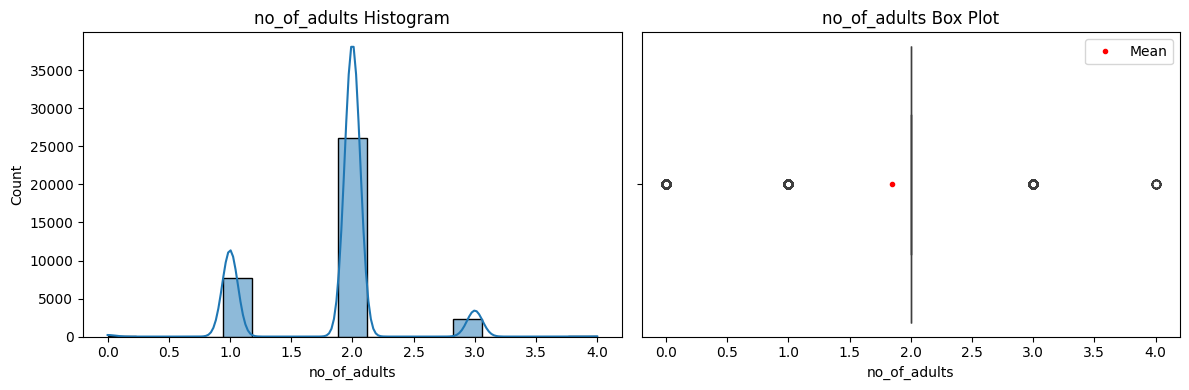

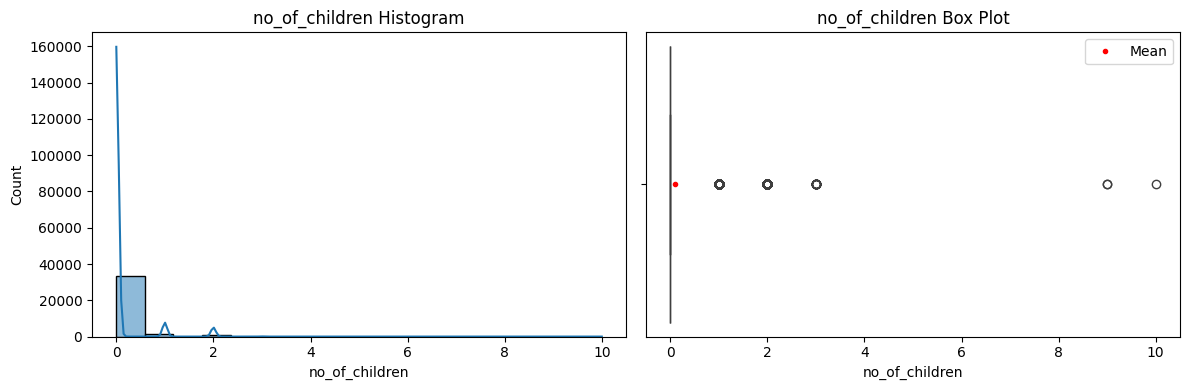

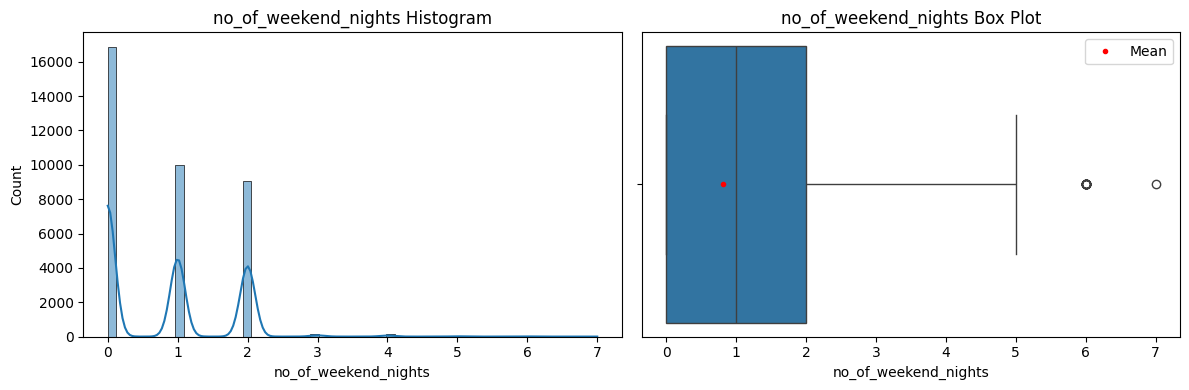

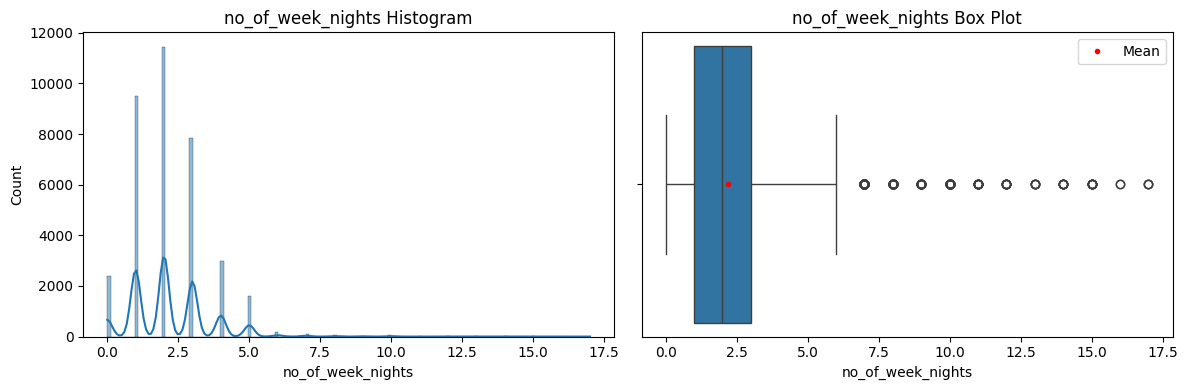

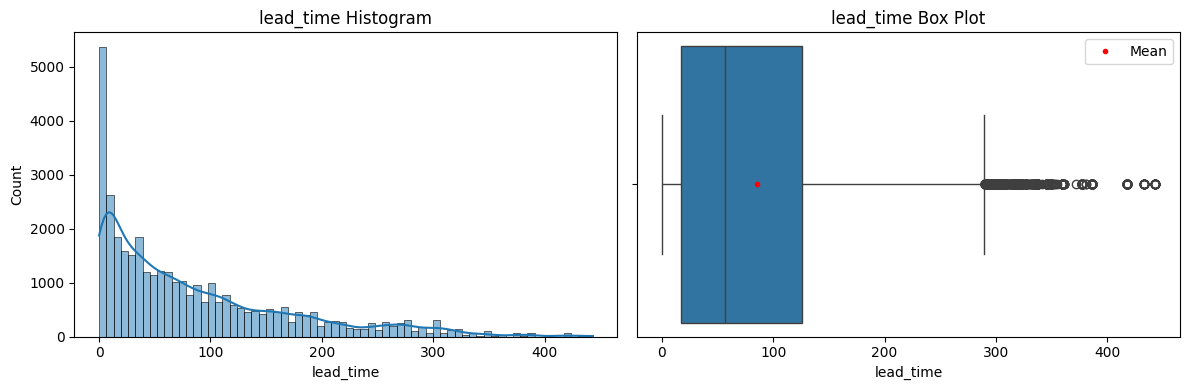

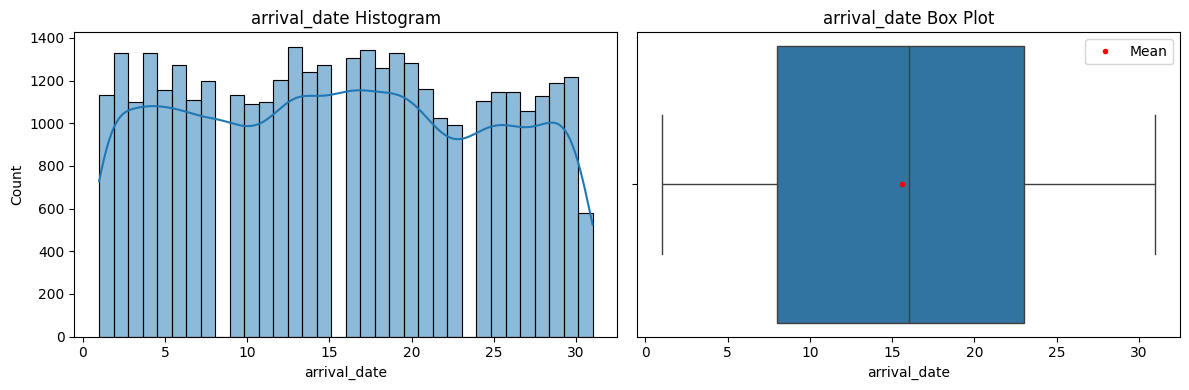

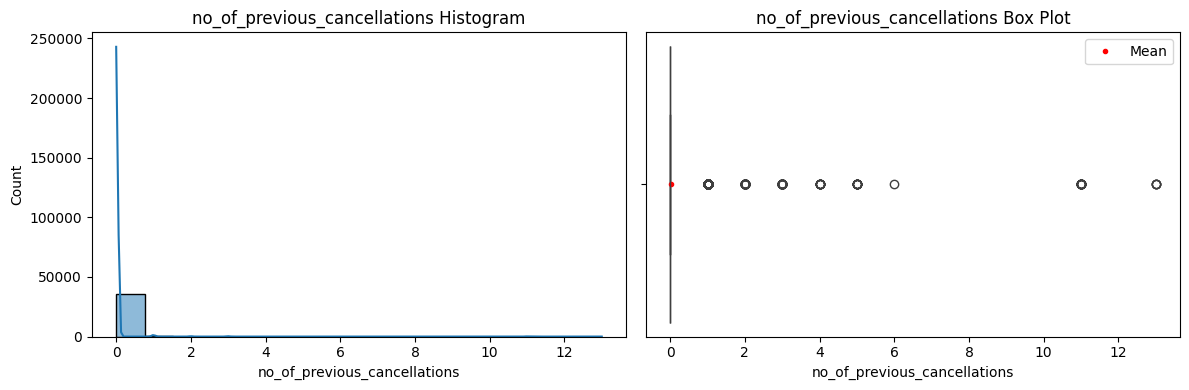

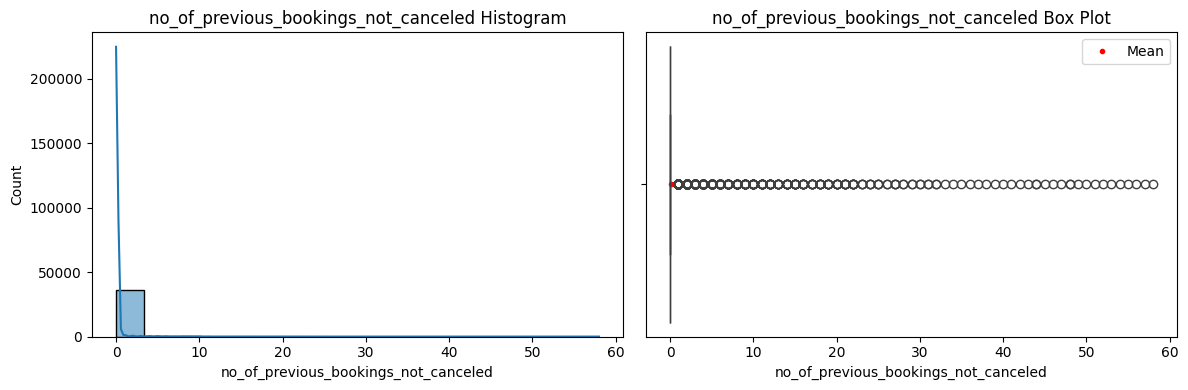

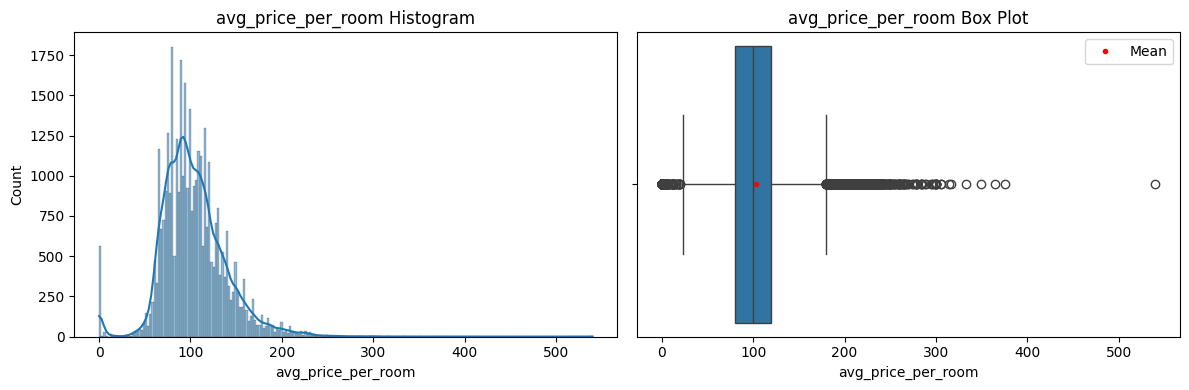

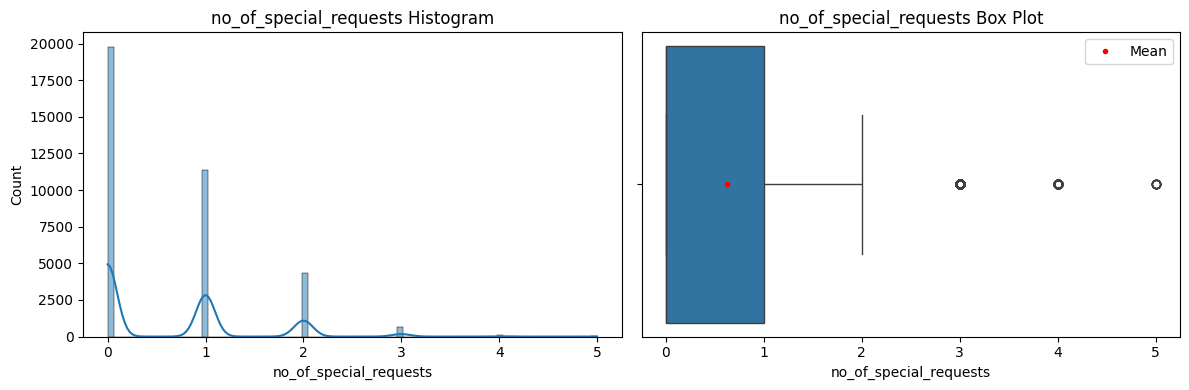

In [ ]:
for col in data.select_dtypes(include='number'):
  hist_box_plot(col)

##### Obaservations
1) The variables; number of adults, number of weekend nights, and Arrival date all have a mean that is greater than the medium. This suggests for left skewed data however in all cases, the kernel density plots don't visualize this clearly.

2) The variables; number of children, number of week nights, lead time, number of previous cancellations, number of previous booking not cancelled, average price per room, and number of special requests all have their mean greater than their median.

3) Based on the kde plots, lead time, number of previous cancellations, number of previous bookings not cancelled and average price per room are all having a right skewed distribution. The rest of the variables whose mean is greater than their medians have their kde plots not clearly visualizing the right skewed distribution.

4) number of previous cancellations and number of previous bookings not cancelled have their means only slightly greater than their medians.

5) The variables number of adults, number of children, number of weekend nights, number of week nights, arrival date and number of special requests all have discrete kind of data.

6) Lead time and Average price per room have continuous data.

7) There are no outliers in the variable arrival date. This is in line with the fact that there are at most 31 days in a month thus not outliers expected.

8) There are outliers beyond both the right and left whiskers in the variables number of adults and average price per room.

9)The variables; number of children, number of weekend nights, number of week nights, Lead time, number of previous cancellations, number of previous boolings not cancelled and number of special request all had outliers beyond the right sided whisker.

##### Insights;

1) Convert numbers representing the month to their alphabetic short forms. This will ease one-hot encoding and will also incorporate the month or year in the model.

2) Outliers will need to be further investigated.

#### Bar Plot for Each Categorical or Object Variable

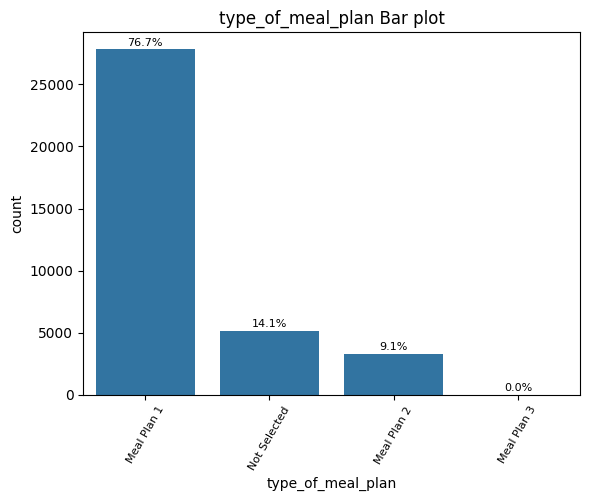

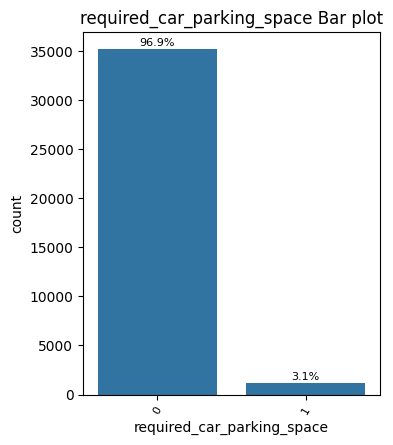

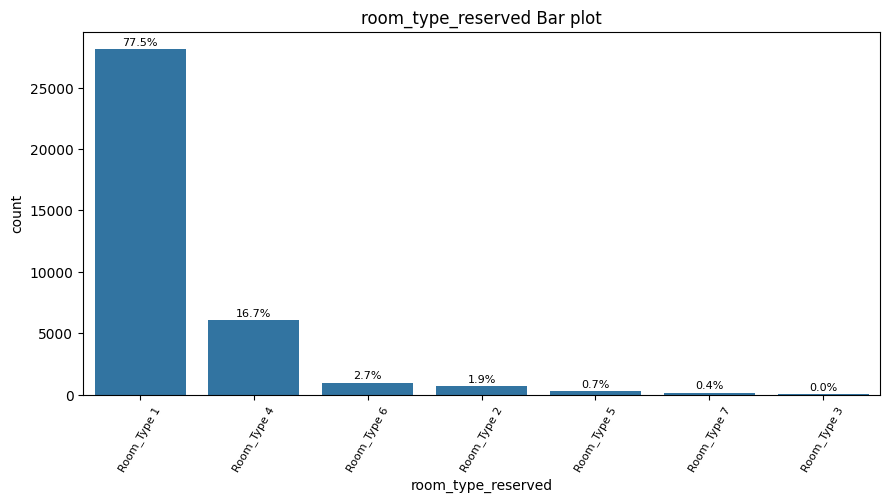

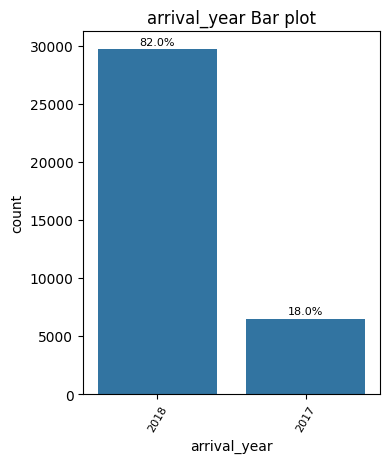

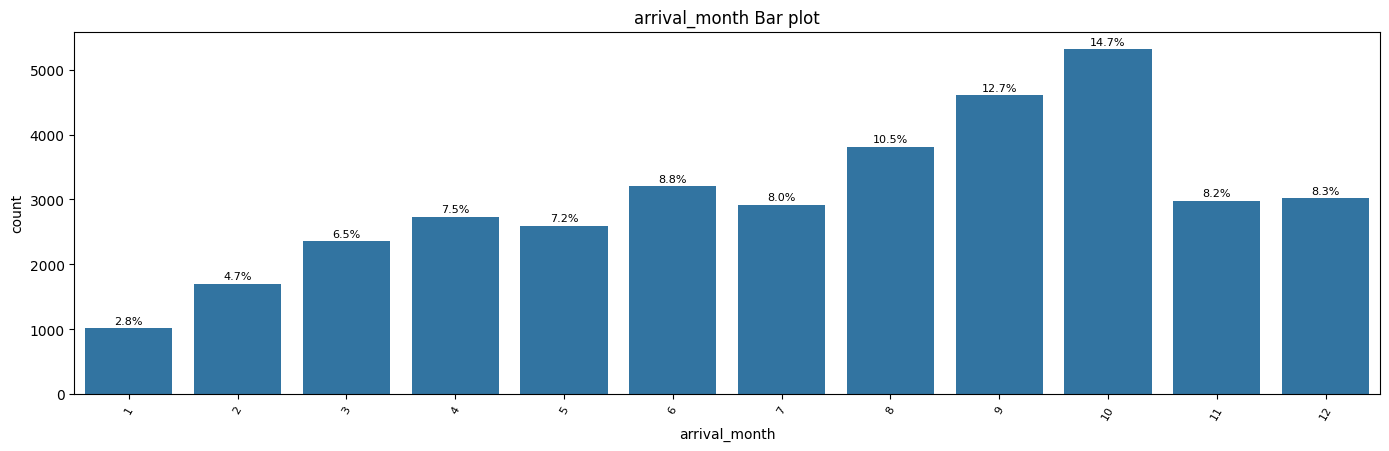

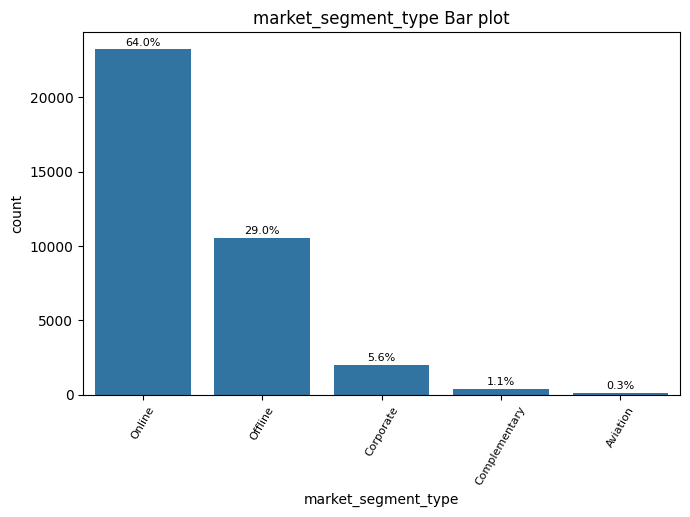

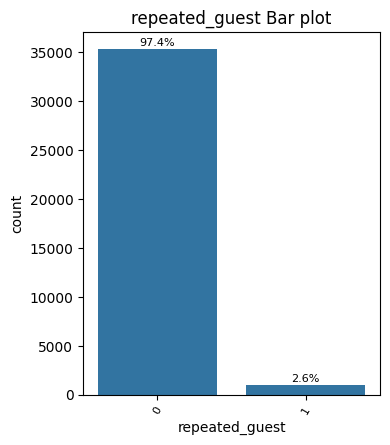

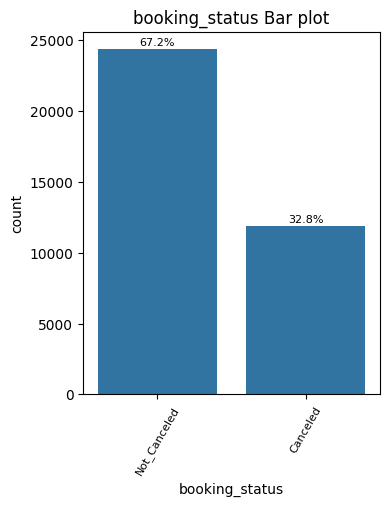

In [ ]:
# Creating loop to plot bar plots for all the categorical & object variables
for col in data.select_dtypes(include=['object', 'category']):
  labeled_barplot(data, col, fig_height=5)

##### Observations
1) Breakfast only was the most requested meal plan. It was included in 78.5% of the bookings. Full meals was the least requested meal plan and contributed 0% of the sampled Bookings.

2) 95.8% of the Bookings did not include a requirement for car parking space.

3) 71.7% of the Bookings were for Room Type 1 clearly demonstrating that it is most favoured. Room Type 3 was the least favoured with 0% bookings for it.

4) 85% of the Bookings were scheduled to arrive at the hotel in the year 2018.

5) October was the month that had the highest proportion (12.3%) of scheduled arrivals among the sampled Bookings and expected to be the busiest of the year. It was followed by September (11.8%) and August (11.8%). January had the least proportion (3%) of scheduled arrivals.

6) Majority of the clients were from the Online market segment and accounted for 77% of all the bookings made to the hotel. Aviation market segment had the least contribution at a mere 0.4%.

7) Only 3.3% of the guests had previously been at the hotel. the majority proportion of 96.7% of the bookings were from new customers.

8) 28.6% of all bookings made were eventually cancelled.

### Multivariate analysis

#### Heat Map for correlation between the numerical variables

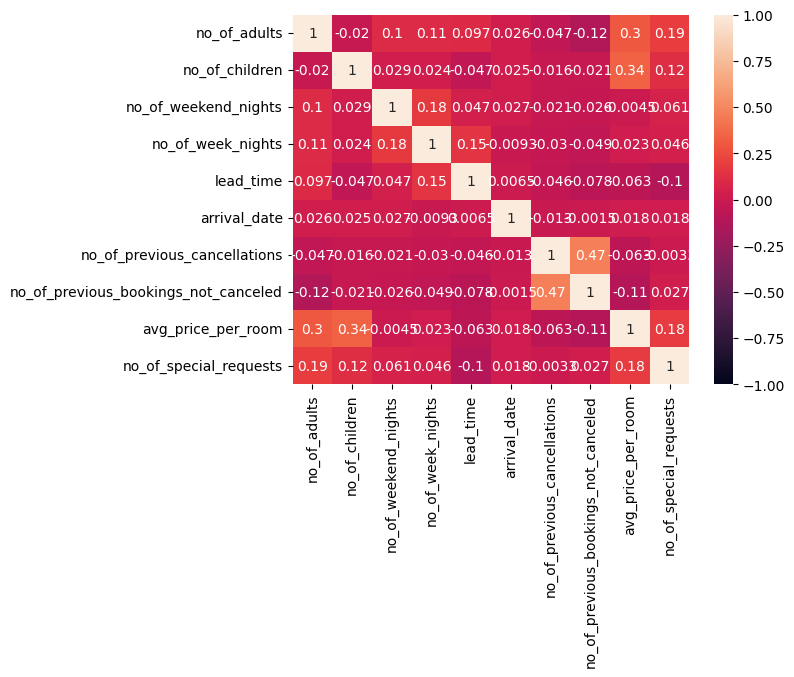

In [ ]:
sns.heatmap(data = data.select_dtypes(include='number').corr(), annot=True,vmin=-1,vmax=1);

##### Observations
1) There is generally a low correlation between majority of the numerical variations.

2) There is a high correlation of 50% between no_of_previous_bookings_not_cancelled and no_of_previous_cancellations.

3) There is a 33% correlation between Average price per room and number of Adults.

4) There is a 35% correlation between Average price per room and number of children.

#### Relationship between room prices and market segments.

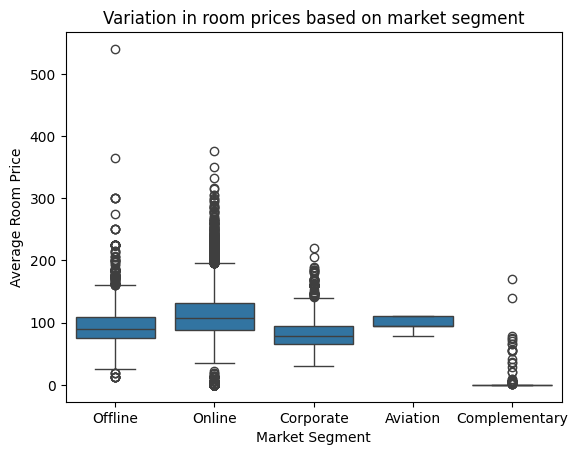

In [ ]:
# Plotting box plot to visualise the variation in room prices based on market segment
sns.boxplot(x='market_segment_type', y='avg_price_per_room', data=data);

plt.title('Variation in room prices based on market segment'); #setting the plot title
plt.xlabel('Market Segment'); #setting the x-axis label
plt.ylabel('Average Room Price'); #setting the y-axis label

##### Observation
Online market segment had the highest average Prices per room and Complementary segment with the least average prices per room.

#### Relationship between repeating guests and Booking being cancelled

In [ ]:
# User- defined function for ploting Bar plot with percentages on each bar.
def labeled_barplot(data, x_var, y_var, fig_height, perc=True, n=None):
    """
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    #Defining the count and Total to compute percentage:
    # length of the column
    total = len(data[y_var])
    # number of the unique values in the variable
    count = data[y_var].nunique()
    # Setting the plot size based on number of unique values to plot.
    if n is None:
        plt.figure(figsize=(count + 2, fig_height))
    else:
        plt.figure(figsize=(n + 2, fig_height))
    # Setting the x-axis characteristics for better visual
    plt.xticks(rotation=60, fontsize=8)
    # Plotting the chart
    ax = sns.countplot(data=data, hue=x_var,x=y_var)

    # Adding a title and axis labels
    ax.set_title(f'Relationship between {x_var} and {y_var}')

    # Calculating the percentages
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        # width of the plot
        x = p.get_x() + p.get_width() / 2
        # height of the plot
        y = p.get_height()

        # annotate the percentage
        ax.annotate(label,(x, y), ha="center", va="center", size=8, xytext=(0, 5), textcoords="offset points",)

    plt.tight_layout()

    # Adjust plot parameters to add spacing
    plt.subplots_adjust(bottom=0.2)  # Increase bottom margin

    plt.show()  # show the plot

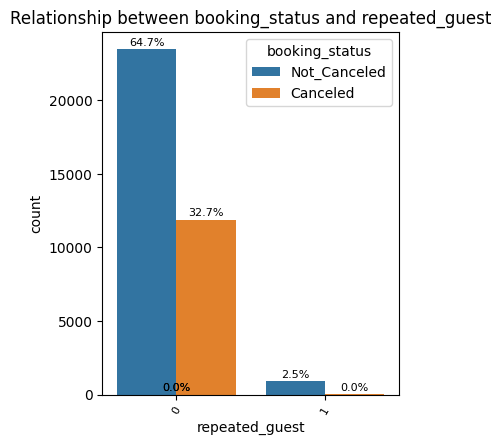

In [ ]:
# Plotting Relationship between repeating guests and Booking being cancelled
labeled_barplot(data,'booking_status', 'repeated_guest', fig_height=5)

##### Observation
There was generally a much higer tendency for none repeat guests to cancel their bookings with cancelled booking being over 50% of the un-cancelled bookings. Repeat guests didn't cancel their bookings.

#### Relationship between Special Requests and Booking being cancelled

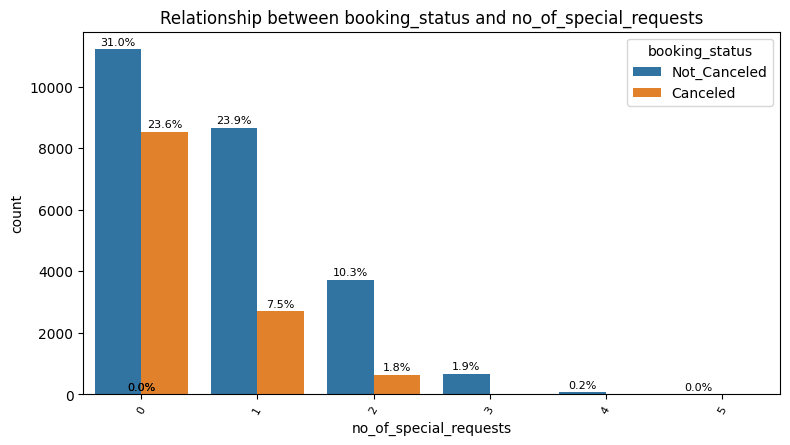

In [ ]:
# Plotting Relationship between repeating guests and Booking being cancelled
labeled_barplot(data,'booking_status', 'no_of_special_requests', fig_height=5)

##### Observation
Generally, the fewer the special requests made, the higher there was a tendency to cancel the booking.

the ratio of not cancelled to cancelled booking greatly reduced with increase in the number of special requests made by the customer.

#### Relationship between average price per room and arrival month

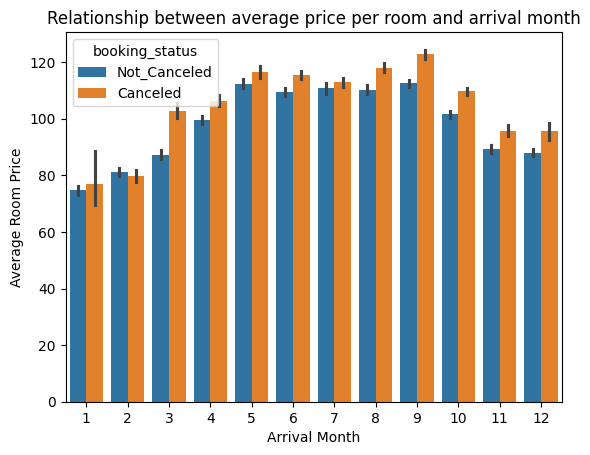

In [ ]:
# Plotting barplot to examine this relationship
sns.barplot(x='arrival_month', y='avg_price_per_room',hue='booking_status', data=data);

# Setting the title and axis labels
plt.title('Relationship between average price per room and arrival month'); #setting the plot title
plt.xlabel('Arrival Month'); #setting the x-axis label
plt.ylabel('Average Room Price'); #setting the y-axis label

##### Observation
The highest Average room prices were in September, followed by May,then August. Interestingly, the price for October could be the equilibrium price given that October experienced the highest proportion of bookings although September would have the best margins due to its high price and second highest bookings.

The average room prices for cancelled orders is always higher than that of the non-cancelled bookings.

#### Relationship between average price per room and arrival Date

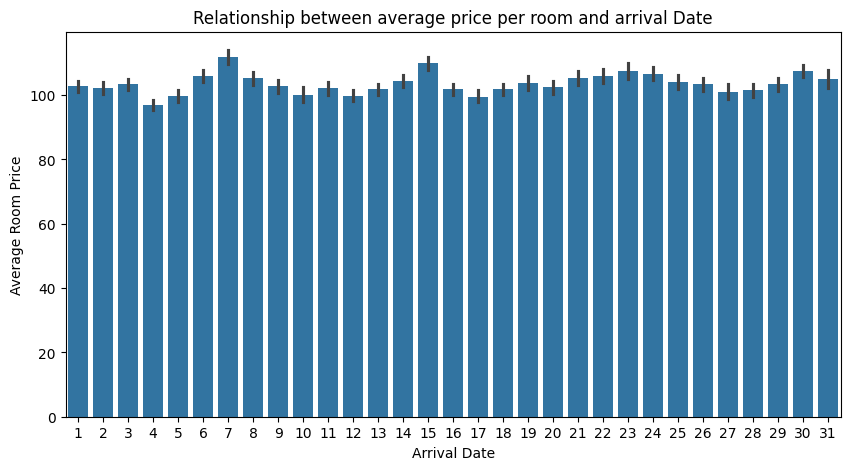

In [ ]:
# Plotting barplot to examine this relationship
plt.figure(figsize=(10,5))
sns.barplot(x='arrival_date', y='avg_price_per_room', data=data);

# Setting the title and axis labels
plt.title('Relationship between average price per room and arrival Date'); #setting the plot title
plt.xlabel('Arrival Date'); #setting the x-axis label
plt.ylabel('Average Room Price'); #setting the y-axis label

##### Observation
Not much change in average price across the dates of the month

#### Relationship among market segment, Booking status and lead time.

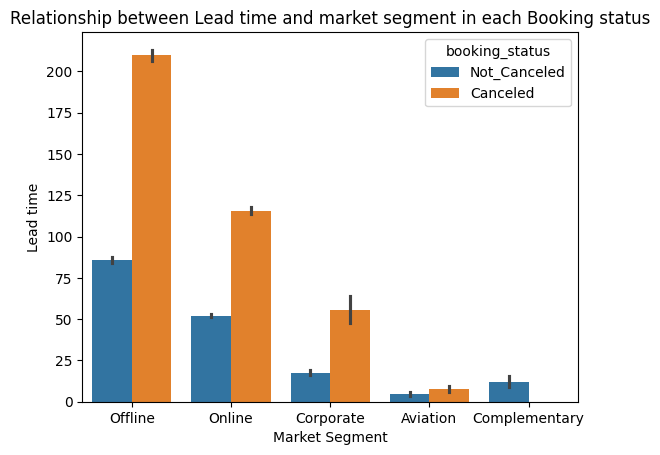

In [ ]:
# Plotting barplot to examine this relationship
sns.barplot(x='market_segment_type', y='lead_time', hue = 'booking_status', data=data);

# Setting the title and axis labels
plt.title('Relationship between Lead time and market segment in each Booking status'); #setting the plot title
plt.xlabel('Market Segment'); #setting the x-axis label
plt.ylabel('Lead time'); #setting the y-axis label

##### Observations
1) In the market segments of Offline, Online and Corporate, there was a higher tendency to cancel bookings when the lead time was longer than 70 days, 50 days and 15 days repectively.

2) Complementary market segment has literally no cancellations and thus is a safe market although on average has the lowest room prices thus might not be so profitable.

#### Relationship among average room prices, number of adults and Booking status

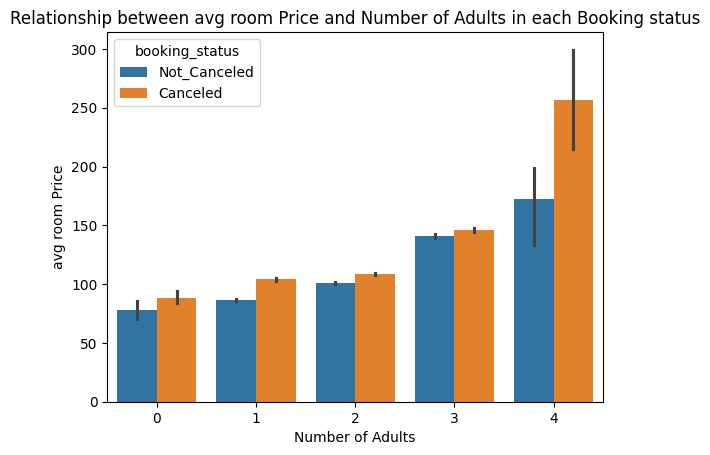

In [ ]:
# Plotting barplot to examine this relationship
sns.barplot(x='no_of_adults', y='avg_price_per_room', hue = 'booking_status', data=data);

# Setting the title and axis labels
plt.title('Relationship between avg room Price and Number of Adults in each Booking status'); #setting the plot title
plt.xlabel('Number of Adults'); #setting the x-axis label
plt.ylabel('avg room Price'); #setting the y-axis label

##### Observation
The average room prices for the cancelled Bookings was always higher than that for the Bookings that aren't cancelled.

#### Relationship between Number of previous cancellations, Average room price and Booking Status

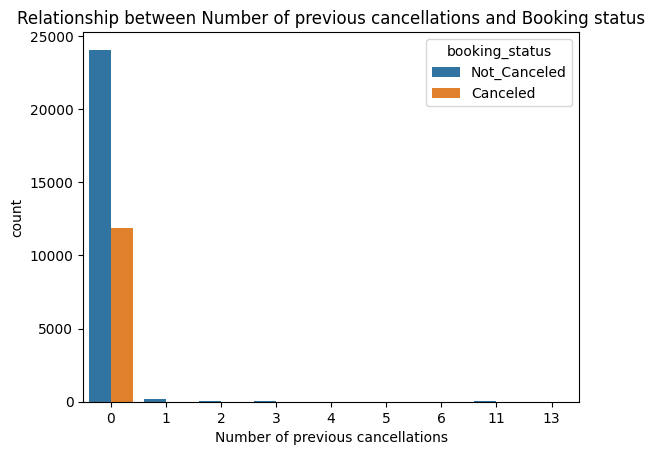

In [ ]:
# Plotting countplot to examine this relationship
sns.countplot(x='no_of_previous_cancellations', hue = 'booking_status', data=data);

# Setting the title and axis labels
plt.title('Relationship between Number of previous cancellations and Booking status'); #setting the plot title
plt.xlabel('Number of previous cancellations'); #setting the x-axis label

##### Observation
There was a reluctancy to cancel a booking when the customer had previously cancelled their booking.

#### Relationship between selected meal plan and Booking status

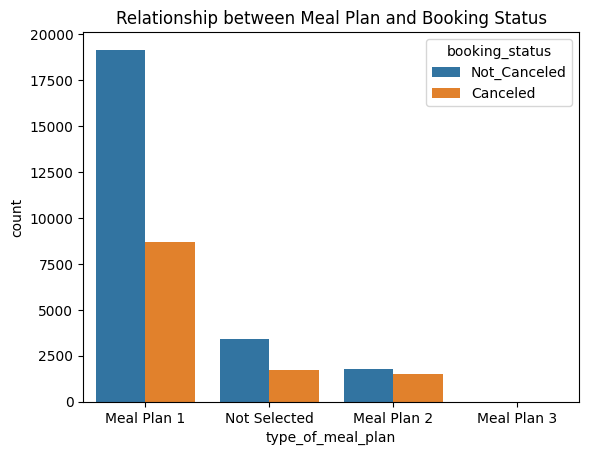

In [ ]:
# Plotting countplot to examine this relationship
sns.countplot(x='type_of_meal_plan', hue = 'booking_status', data=data);

# Setting the title and axis labels
plt.title('Relationship between Meal Plan and Booking Status'); #setting the plot title

##### Observation
Thee booking cancellation was less than half the number of bookings not cancelled when Meal Plan 1 was selected ot when no plan was selected. There was a much higher tendency to cancel the booking when meal plan 2 was selected by the client.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Feature Engineering

In [ ]:
# Changing the arrival months from numbers to months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data['arrival_month'] = data['arrival_month'].apply(lambda x: months[x-1])

In [ ]:
# Dropping Arrival Date because it information is caputured under Lead time variable
data.drop('arrival_date', axis=1, inplace=True)

In [ ]:
# Chenging Booking status values to 0 and 1
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == "Canceled" else 0)


In [ ]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,Oct,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,Nov,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,Feb,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,May,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,Apr,Online,0,0,0,94.50000,0,1


### Outlier detection and treatment

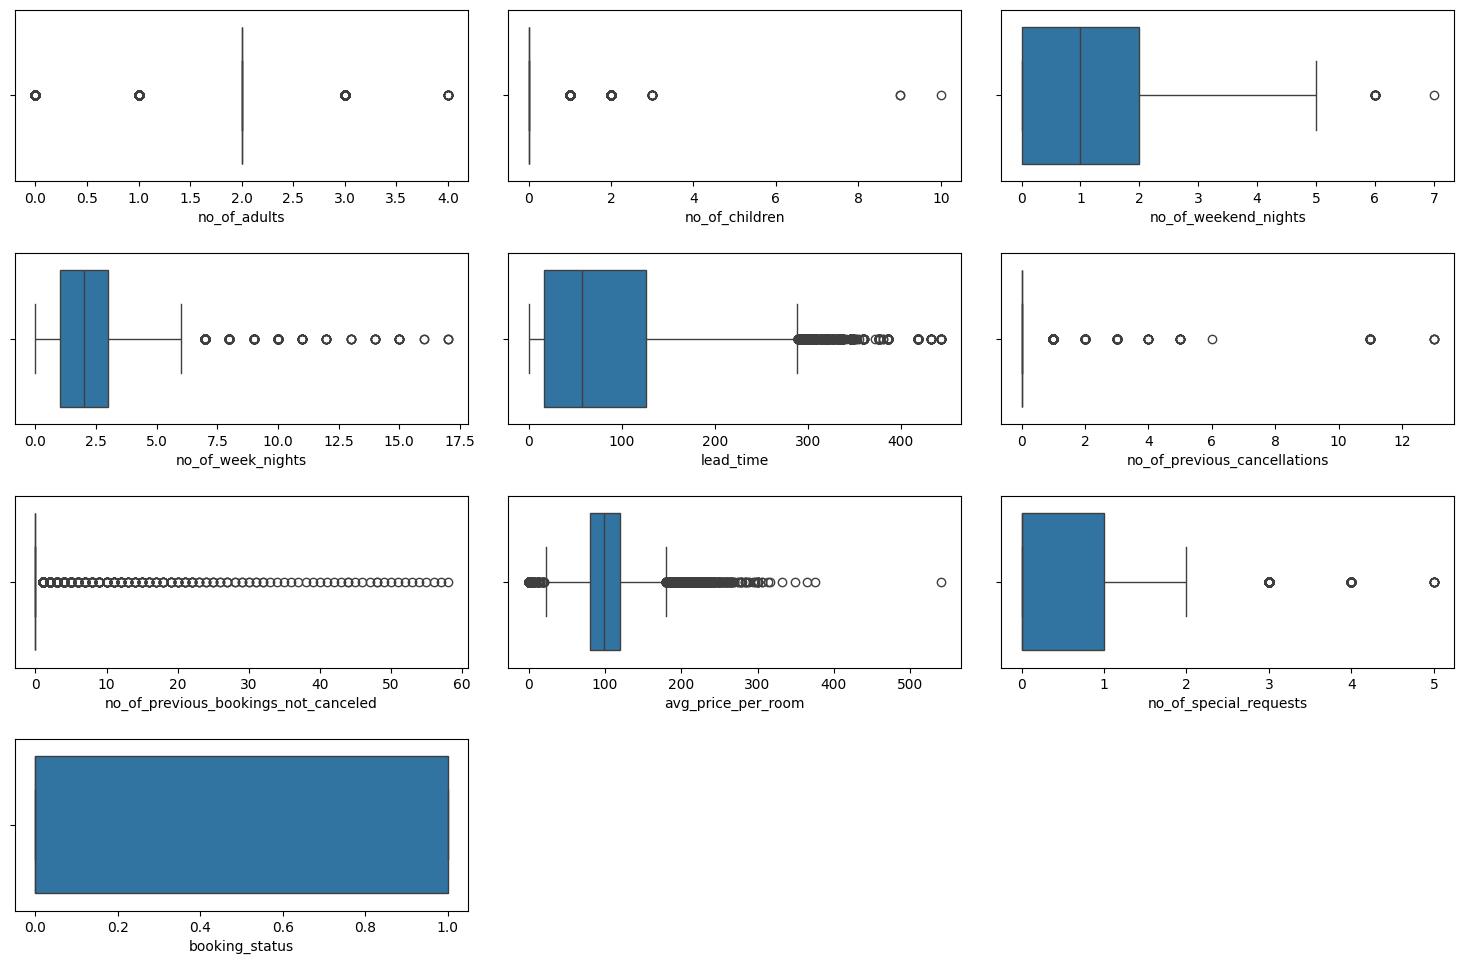

In [ ]:
# outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=data, x=variable)
    plt.tight_layout(pad=2)

plt.show()

##### Observation
All the numerical variables have outliers present.

In [ ]:
# Viewing row with children above 8
data[data['no_of_children'] > 8]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
6338,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,Jan,Online,0,0,0,84.45000,1,0
10041,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,Oct,Corporate,0,0,0,95.00000,0,0
10061,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,Aug,Online,0,0,0,76.50000,1,1


These look like actual values so no treating them

In [ ]:
# Viewing rows with no_of_weekend_nights above 6
data[data['no_of_weekend_nights'] > 6]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
19512,2,0,7,17,Meal Plan 1,0,Room_Type 1,188,2018,Jul,Online,0,0,0,90.95000,1,1


Booking from 1st July 2018 to 24th July 2018 would total 7 weekend nights and 17 week nights. I will not drop this row and will assume it was an actual booking.

In [ ]:
# Viewing rows with no_of_previous_bookings_not_canceled above 30
data[data['no_of_previous_bookings_not_canceled'] > 30]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1626,1,0,2,6,Meal Plan 1,0,Room_Type 1,7,2018,Nov,Corporate,1,5,50,65.00000,0,0
2403,1,0,1,2,Meal Plan 1,0,Room_Type 1,3,2018,May,Corporate,1,3,34,65.00000,0,0
4603,1,0,1,2,Meal Plan 1,0,Room_Type 1,4,2018,Oct,Corporate,1,5,49,65.00000,2,0
4828,1,0,1,3,Meal Plan 1,0,Room_Type 1,3,2018,Oct,Corporate,1,4,47,65.00000,1,0
4864,1,0,1,2,Meal Plan 1,0,Room_Type 1,2,2018,Nov,Corporate,1,5,53,65.00000,2,0
6498,1,0,1,2,Meal Plan 1,1,Room_Type 1,7,2018,May,Corporate,1,3,33,67.00000,0,0
7787,1,0,2,3,Meal Plan 1,0,Room_Type 1,3,2018,Nov,Corporate,1,5,52,65.00000,2,0
9608,1,0,0,1,Meal Plan 1,0,Room_Type 1,9,2018,Oct,Corporate,1,5,48,65.00000,0,0
13557,1,0,2,0,Meal Plan 1,0,Room_Type 1,2,2018,Jul,Corporate,1,3,39,65.00000,0,0
14422,2,0,0,1,Meal Plan 1,0,Room_Type 1,0,2018,Oct,Complementary,1,0,31,0.00000,4,0


Given that majority of these are from Corporate Market, I will consider them as actual values given that corporates might have previous been booking alot.

In [ ]:
# Checking the rows above 400 euros in average price per room
data[data['avg_price_per_room'] > 400]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
33114,2,0,0,1,Meal Plan 1,0,Room_Type 1,35,2018,Mar,Offline,0,0,0,540.00000,0,1


I will be treating this row because its price is way above the price of others with similar metrics like room type.

In [ ]:
# Dropping row 33114
data.drop(33114, axis=0, inplace=True)

##### Insight
I will not be treating for the outliers because they seem to be actual values.

### Preparing data for modeling

In [ ]:
# Defining the Independent and Dependent variables
X = data.drop(['booking_status'], axis=1)
Y = data['booking_status']

# adding a constant to the independent variables
X = sm.add_constant(X)

# One-Hot Encoding
X = pd.get_dummies(X, drop_first=True).astype('float')

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25391, 37)
Shape of test set :  (10883, 37)
Percentage of classes in training set:
booking_status
0   0.66957
1   0.33043
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67895
1   0.32105
Name: proportion, dtype: float64


The proportions of the classes of Booking Status in the training set and test set are not so different with a variation of less than 1%. The number of columns has increased due to One-Hot encoding.

In [ ]:
# Getting Statistical summary of the X-Variables
X.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
const,36274.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000
no_of_adults,36274.00000,1.84496,0.51872,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36274.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36274.00000,0.81075,0.87065,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36274.00000,2.20433,1.41091,0.00000,1.00000,2.00000,3.00000,17.00000
lead_time,36274.00000,85.23394,85.93160,0.00000,17.00000,57.00000,126.00000,443.00000
no_of_previous_cancellations,36274.00000,0.02335,0.36834,0.00000,0.00000,0.00000,0.00000,13.00000
no_of_previous_bookings_not_canceled,36274.00000,0.15342,1.75419,0.00000,0.00000,0.00000,0.00000,58.00000
avg_price_per_room,36274.00000,103.41150,35.01495,0.00000,80.30000,99.45000,120.00000,375.50000
no_of_special_requests,36274.00000,0.61967,0.78624,0.00000,0.00000,0.00000,1.00000,5.00000


The means of the numerical variables had very small changes even after the Data preprocessing and thus can consider that the data hasn't been significantly altered.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
# Getting the VIF for each variable
vif_series = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  378.68877
no_of_adults                             1.37766
no_of_children                           2.00186
no_of_weekend_nights                     1.07536
no_of_week_nights                        1.10513
lead_time                                1.54025
no_of_previous_cancellations             1.35516
no_of_previous_bookings_not_canceled     1.59920
avg_price_per_room                       2.54818
no_of_special_requests                   1.25358
type_of_meal_plan_Meal Plan 2            1.29605
type_of_meal_plan_Meal Plan 3            1.02637
type_of_meal_plan_Not Selected           1.28421
required_car_parking_space_1             1.04012
room_type_reserved_Room_Type 2           1.10007
room_type_reserved_Room_Type 3           1.00333
room_type_reserved_Room_Type 4           1.37074
room_type_reserved_Room_Type 5           1.03318
room_type_reserved_Room_Type 6           1.99662
room_type_reserved_Room_Type 7    

All the non-dummy variables have a VIF below 5 and therefore no Multicollinearity

## Building a Logistic Regression model

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train)
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25391
Model:                          Logit   Df Residuals:                    25354
Method:                           MLE   Df Model:                           36
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.3528
Time:                        13:21:47   Log-Likelihood:                -10426.
converged:                      False   LL-Null:                       -16110.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -5.6193      0.368    -15.258      0.000      -6.341      -4.898
no_of_adults                             0.1663      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Removing High p-value variables

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'required_car_parking_space_1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'arrival_year_2018', 'arrival_month_Feb', 'arrival_month_Mar', 'arrival_month_Apr', 'arrival_month_May', 'arrival_month_Jun', 'arrival_month_Jul', 'arrival_month_Aug', 'arrival_month_Sep', 'arrival_month_Oct', 'arrival_month_Nov', 'arrival_month_Dec', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'repeated_guest_1']


In [ ]:
# running new model with all high p-value variables eliminated
X_train2 = X_train[selected_features]
logit2 = sm.Logit(y_train, X_train[selected_features])
lg = logit2.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25391
Model:                          Logit   Df Residuals:                    25359
Method:                           MLE   Df Model:                           31
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.3518
Time:                        13:21:50   Log-Likelihood:                -10442.
converged:                       True   LL-Null:                       -16110.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -5.9631      0.273    -21.854      0.000      -6.498      -5.428
no_of_adults                       0.1620      0.039      4.205      0.

##### Observations
1) The model has converged and nolonger brings a warning after eliminating high p-value variables.

2) Increase in no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, avg_price_per_room, type_of_meal_plan being not selected, arrival_year, market segment type being online and arrival_month all increased the probability of the Booking being cancelled.

3) Increase in no_of_special_requests, need for a car parking space, choosing room types otherthan Room_type_5, 6 and 7, being from the Offline market segments and being a repeated guest all reduced the probability of a Booking being cancelled.

In [ ]:
# converting coefficients to odds
odds = np.exp(lg.params)

# finding the percentage change
perc_change_odds = (np.exp(lg.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,required_car_parking_space_1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_year_2018,arrival_month_Feb,arrival_month_Mar,arrival_month_Apr,arrival_month_May,arrival_month_Jun,arrival_month_Jul,arrival_month_Aug,arrival_month_Sep,arrival_month_Oct,arrival_month_Nov,arrival_month_Dec,market_segment_type_Corporate,market_segment_type_Offline,repeated_guest_1
Odds,0.00257,1.17589,1.23782,1.16433,1.05446,1.01633,1.32199,1.01945,0.21055,1.19653,1.32492,0.19500,0.70540,0.76554,0.43747,0.36123,0.22711,1.62222,17.34933,14.26635,10.75587,7.25563,8.98275,8.43837,7.59995,7.53704,10.01244,14.20774,2.09440,0.46303,0.15995,0.10541
Change_odd%,-99.74281,17.58890,23.78152,16.43268,5.44575,1.63344,32.19946,1.94547,-78.94541,19.65343,32.49172,-80.50033,-29.45972,-23.44629,-56.25265,-63.87681,-77.28903,62.22189,1634.93331,1326.63515,975.58698,625.56336,798.27539,743.83667,659.99503,653.70449,901.24356,1320.77430,109.44008,-53.69700,-84.00517,-89.45876


##### Observations:
* A 1 unit increase in the number of children results in a 13.65% increase in odds of the booking being cancelled
* A 1 unit increase in no_of_weekend_nights results in a 5.97% increase in odds of the booking being cancelled.
* A 1 unit increase in number of special requests made decreases the odds of the booking being cancelled by 78.2%
* The odds of a booking being cancelled when no meal plan is selected are approximately 1.42 times more than when Meal plan 1 is selected.
* There are approximately 80.58% fewer odds of a booking being cancelled when the client requires car parking space than when they don't.


## Model performance evaluation

In [ ]:
# defining a function to compute different metrics to check performance
#of a classification model built using statsmodels
def model_performance_classification(model, ind_var, dep_var, threshold=0.5):

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(ind_var) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(dep_var, pred)  # to compute Accuracy
    recall = recall_score(dep_var, pred)  # to compute Recall
    precision = precision_score(dep_var, pred)  # to compute Precision
    f1 = f1_score(dep_var, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},index=[0])

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, ind_var, dep_var, threshold=0.5):

    y_pred = model.predict(ind_var) > threshold
    cm = confusion_matrix(dep_var, y_pred)
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

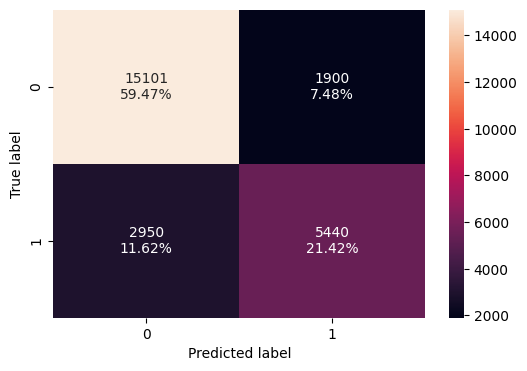

In [ ]:
# Confusion matrix for training model
confusion_matrix_statsmodels(lg, X_train2, y_train, threshold=0.5)

In [ ]:
# Checking the model performance parameters on Train data set
log_reg_model_train_perf = model_performance_classification(lg, X_train2, y_train)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80899,0.64839,0.74114,0.69167


The Recall score is 58.3% and lower than 71.4% which is the proportion of bookings that weren't cancelled. A higher loss is made to the hotel when rooms are booked and cancelled at last minute so need to raise the threshold and get a higher recall.

#### Performance on Test Data

In [ ]:
X_test2 = X_test[list(X_train2.columns)]

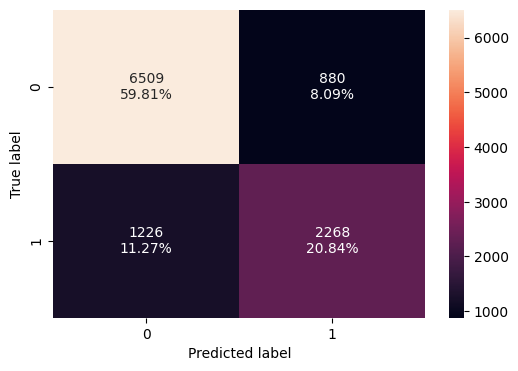

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_test2, y_test)

In [ ]:
# Checking the model performance parameters on Test data set
log_reg_model_test_perf = model_performance_classification(lg, X_test2, y_test)

print("Testing performance:")
log_reg_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.80649,0.64911,0.72046,0.68293


The recall is low. Need to improve the model

## Model Performance Improvement

### ROC Curve and ROC-AUC

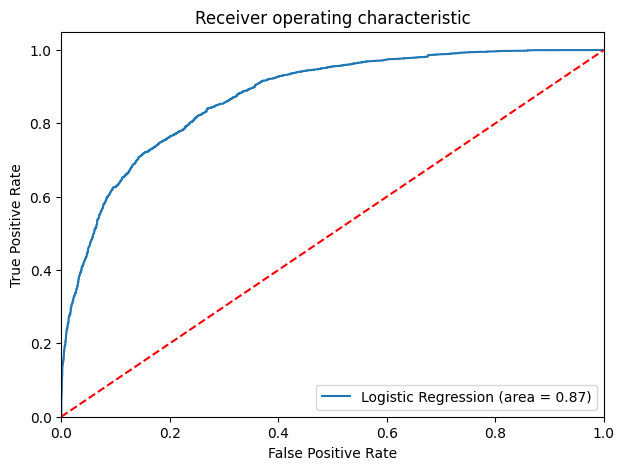

In [ ]:
# ROC-AUC on training set
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The model is doing okay but need to find the optimal threshold level

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.2659957854448651


#### Checking model performance at optimal threshold

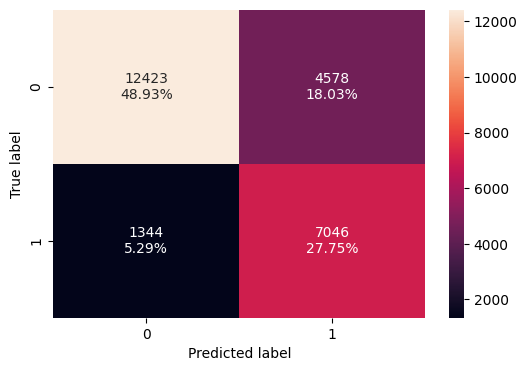

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_train2, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification(lg, X_train2, y_train
                                                                              , threshold=optimal_threshold_auc_roc)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.76677,0.83981,0.60616,0.70411


Recall has increased with a decrease in Precision and Accuracy. However, F1 score has increased meaning that the model have improved.

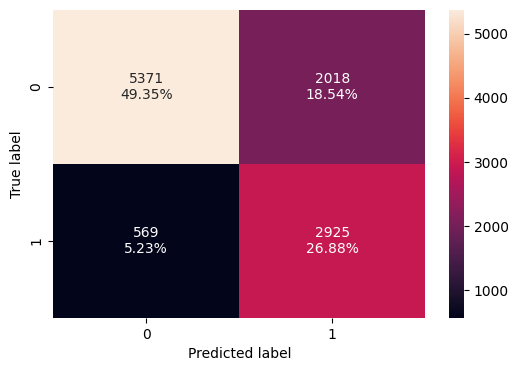

In [ ]:
# Checking performance on test data

# creating confusion matrix
confusion_matrix_statsmodels(lg, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification(lg, X_test2, y_test
                                            , threshold=optimal_threshold_auc_roc)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.76229,0.83715,0.59175,0.69337


#### Precision-Recall Curve

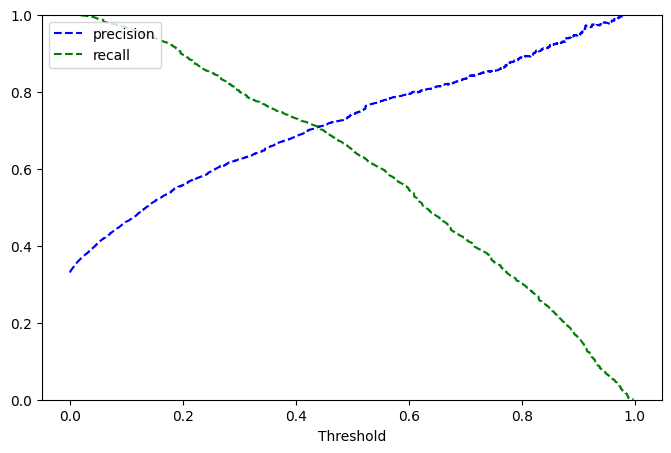

In [ ]:
y_scores = lg.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

# Function to plot the precision-recall curve to find their point of equilibrium
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(8, 5))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Consider a threshold of 0.42

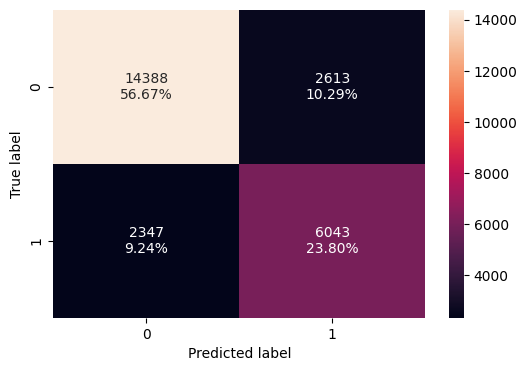

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

# Checking new threshold on training set
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_train2, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification(lg
                                            , X_train2, y_train, threshold=optimal_threshold_curve)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80466,0.72026,0.69813,0.70902


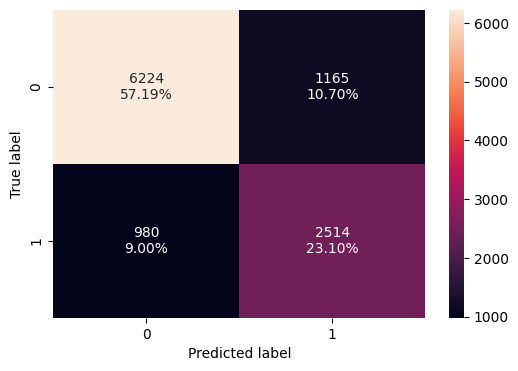

In [ ]:
# Testing on Test set

# creating confusion matrix
confusion_matrix_statsmodels(lg, X_test2, y_test, threshold=optimal_threshold_curve)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_curve = model_performance_classification(lg, X_test2, y_test
                                            , threshold=optimal_threshold_curve)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80290,0.71952,0.68334,0.70096


## Final Model Summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat([log_reg_model_train_perf.T,log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T], axis=1)
models_train_comp_df.columns = ["Logistic Regression-default Threshold (0.5)","Logistic Regression-0.288 Threshold",
    "Logistic Regression-0.42 Threshold"]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.288 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80899,0.76677,0.80466
Recall,0.64839,0.83981,0.72026
Precision,0.74114,0.60616,0.69813
F1,0.69167,0.70411,0.70902


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat([log_reg_model_test_perf.T, log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T], axis=1,)
models_test_comp_df.columns = ["Logistic Regression-default Threshold (0.5)","Logistic Regression-0.288 Threshold",
    "Logistic Regression-0.42 Threshold"]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.288 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80649,0.76229,0.80290
Recall,0.64911,0.83715,0.71952
Precision,0.72046,0.59175,0.68334
F1,0.68293,0.69337,0.70096


- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a threshold of ~0.288 is giving the best Recall score and best F1 score. Therefore it can be selected as the final model from Logistic Regression that will be compared with the decision tree model.

## Building a Decision Tree model

### Data Preparation for Modeling

In [ ]:
# Defining the Independent and Dependent variables
x = data.drop(['booking_status'], axis=1)
y = data['booking_status']

# One-Hot Encoding
x = pd.get_dummies(x, drop_first=True).astype('float')

# Splitting data in train and test sets
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=1)

### EDA

In [ ]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Shape of Training set :  (25391, 36)
Shape of test set :  (10883, 36)
Percentage of classes in training set:
booking_status
0   0.66957
1   0.33043
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67895
1   0.32105
Name: proportion, dtype: float64


The clasese proportions have not changed even after eliminating the column of constant. The columns have reduced from 37 to 36

### Model Building (Default version)

In [ ]:
model = DecisionTreeClassifier(criterion= 'gini',random_state=1, class_weight="balanced")
model.fit(x_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Model Evaluation
For our model, we want to maximise Recall so that although keep a good balance with F1 score. A high Recall will reduce the False Negatives were by a client is predicted to not cancel their booking but they end up canceling their booking.

In [ ]:
# Function to calculate the evaluation metrics for a sklearn classifier
def model_performance_classification_sklearn(model, ind_var, dep_var):

    # predicting using the independent variables
    pred = model.predict(ind_var)

    acc = accuracy_score(dep_var, pred)  # to compute Accuracy
    recall = recall_score(dep_var, pred)  # to compute Recall
    precision = precision_score(dep_var, pred)  # to compute Precision
    f1 = f1_score(dep_var, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0])

    return df_perf

In [ ]:
# Function to plot confusion matrix for a sklearn classifier
def confusion_matrix_sklearn(model, ind_var, dep_var):
    y_pred = model.predict(ind_var)
    cm = confusion_matrix(dep_var, y_pred)
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

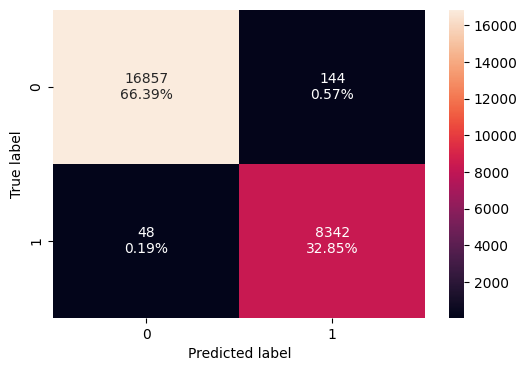

In [ ]:
# Plotting the confusion matrix for the model
confusion_matrix_sklearn(model, x_train, Y_train)

In [ ]:
# Checking the performance metrics on train set
decision_tree_perf_train = model_performance_classification_sklearn(model, x_train, Y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99244,0.99428,0.98303,0.98862


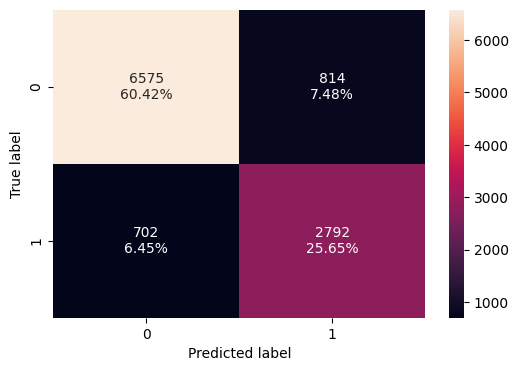

In [ ]:
# Plotting the confusion matrix for the model on test set
confusion_matrix_sklearn(model, x_test, Y_test)

In [ ]:
# Checking the performance metrics on test set
decision_tree_perf_test = model_performance_classification_sklearn(model, x_test, Y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86070,0.79908,0.77427,0.78648


There is a very huge difference between the performance metrics of the model on the train set and the test set. All metrics decreased greater than 3% thus the default model is Overfitting the data.

## Do we need to prune the tree?
We do need to prune the tree.

#### Post Pruning the Decision Tree

In [ ]:
# Finding the alphas to use in Minimal cost complexity prunning
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(x_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00913
1,0.00000,0.00913
2,0.00000,0.00913
3,0.00000,0.00913
4,0.00000,0.00913
...,...,...
1847,0.00820,0.32635
1848,0.00974,0.33610
1849,0.01318,0.34928
1850,0.03479,0.41886


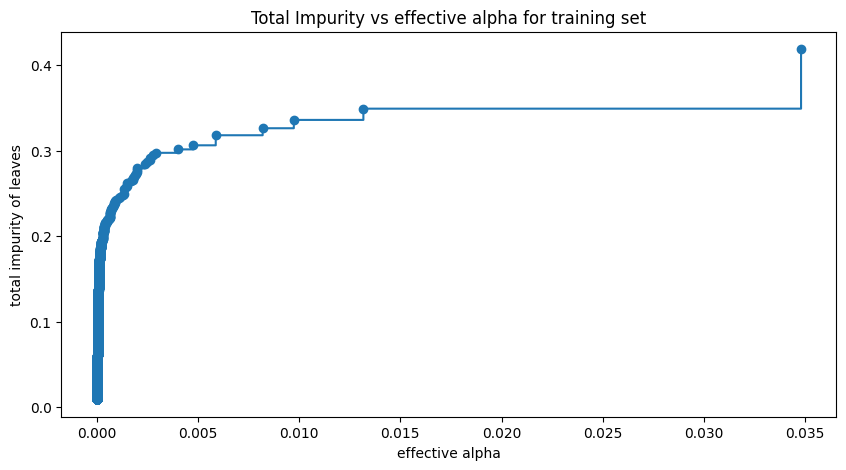

In [ ]:
# Plot for the Total Impurity vs effective alpha for the training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

As alpha increases, impurities increase too due to subsquent increasing simplicity of the decision tree

#### Finding the best Model

In [ ]:
# Training the decision tree model based on the generated effective alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced")
    clf.fit(x_train, Y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08114238675405394


In [ ]:
# Getting the recall values on train set from the model using all effective alphas generated
f1_score_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    f1_values_train = metrics.f1_score(Y_train, pred_train)
    f1_score_train.append(f1_values_train)

In [ ]:
# Getting the recall values on test set from the model using all effective alphas generated
f1_score_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = metrics.f1_score(Y_test, pred_test)
    f1_score_test.append(values_test)

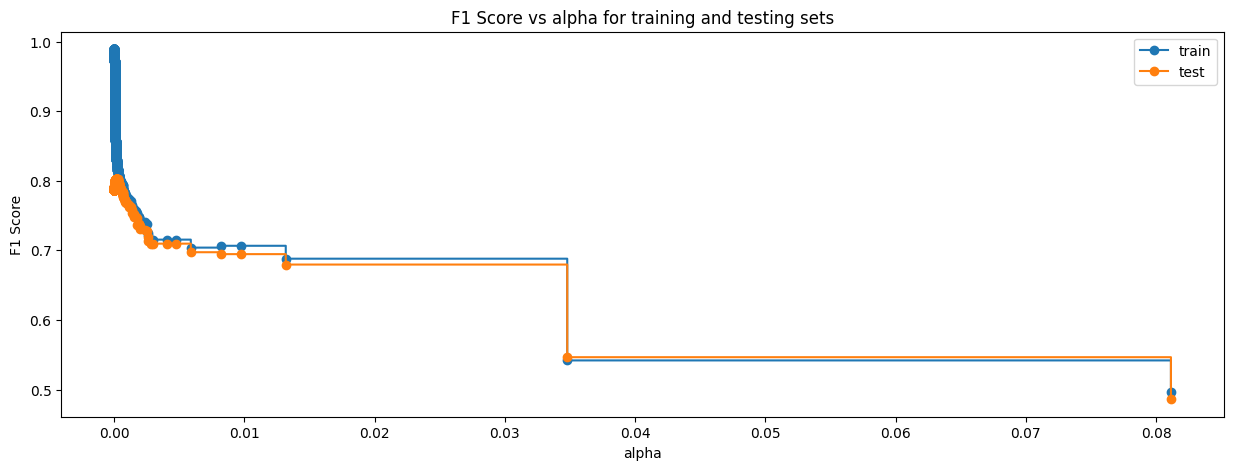

In [ ]:
# Plotting to show Recall vs Alphas of the test and train sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_score_train, marker="o", label="train", drawstyle="steps-post",)
ax.plot(ccp_alphas, f1_score_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test f1 score
index_best_model = np.argmax(f1_score_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00021430706415866314,
                       class_weight='balanced', random_state=1)


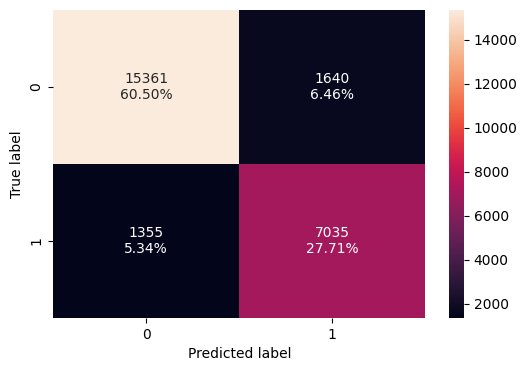

In [ ]:
# Confusion matrix for best model
confusion_matrix_sklearn(best_model, x_train, Y_train)

In [ ]:
# Performance of best model on train set
decision_tree_post_perf_train = model_performance_classification_sklearn(best_model, x_train, Y_train)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.88204,0.83850,0.81095,0.82449


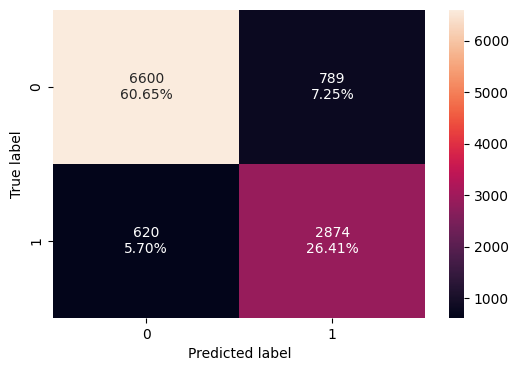

In [ ]:
confusion_matrix_sklearn(best_model, x_test, Y_test)

In [ ]:
# Performance of best model on test set
decision_tree_post_perf_test = model_performance_classification_sklearn(best_model, x_test, Y_test)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.87053,0.82255,0.78460,0.80313


The model doesn't have high difference between the train set and test set and thus no overfitting

#### Pre-Pruning

In [ ]:
# Using Grid Search for Hyperparameter tuning of the model
from sklearn.model_selection import GridSearchCV

# Choosing type of classifier
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10), 'min_samples_leaf':[1,2,5,7,10,12,15,20]
              ,'max_leaf_nodes':[2,3,5,8,10], 'min_impurity_decrease':[0.001,0.01,0.1]}

# Type of scoring to compare parameter combinations
accuracy_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(model1, parameters, scoring=accuracy_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, Y_train)

# Set the clf to the best combination of parameters
best_clf = grid_obj.best_estimator_

# Fit the best algorithm to the data
best_clf.fit(x_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

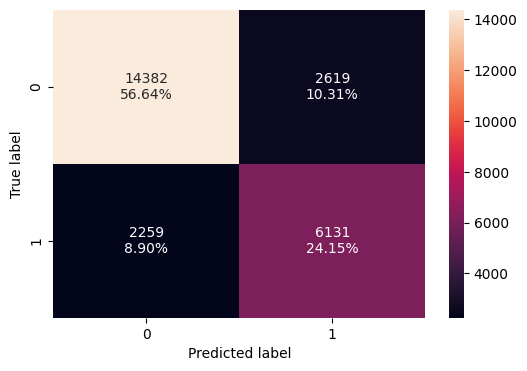

In [ ]:
# Plotting the confusion matrix for best_clf
confusion_matrix_sklearn(best_clf, x_train, Y_train)

In [ ]:
# Performance of model on train set
decision_tree_pre_perf_train = model_performance_classification_sklearn(best_clf, x_train, Y_train)
decision_tree_pre_perf_train

,Accuracy,Recall,Precision,F1
0,0.80788,0.73075,0.70069,0.71540


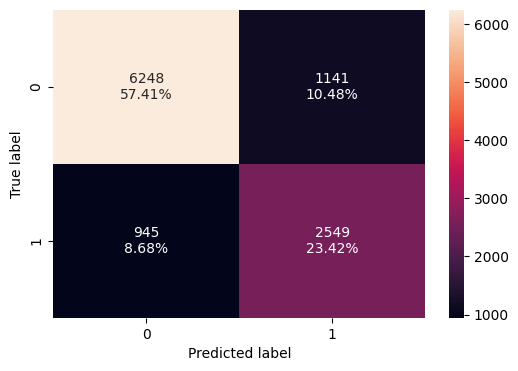

In [ ]:
# Plotting the confusion matrix for best_clf on test set
confusion_matrix_sklearn(best_clf, x_test, Y_test)

In [ ]:
# Performance of model on test set
decision_tree_pre_perf_test = model_performance_classification_sklearn(best_clf, x_test, Y_test)
decision_tree_pre_perf_test

,Accuracy,Recall,Precision,F1
0,0.80832,0.72954,0.69079,0.70963


## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat([log_reg_model_train_perf_threshold_auc_roc.T, decision_tree_post_perf_train.T
                                  , decision_tree_pre_perf_train.T,], axis=1,)
models_train_comp_df.columns = ["Logistic Regression at 0.288","Decision Tree (Post-Pruning)"
,"Decision Tree (Pre-Pruning)",]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression at 0.288,Decision Tree (Post-Pruning),Decision Tree (Pre-Pruning)
Accuracy,0.76677,0.88204,0.80788
Recall,0.83981,0.83850,0.73075
Precision,0.60616,0.81095,0.70069
F1,0.70411,0.82449,0.71540


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat([log_reg_model_test_perf_threshold_auc_roc.T, decision_tree_post_perf_test.T
                                  , decision_tree_pre_perf_test.T,], axis=1,)
models_test_comp_df.columns = ["Logistic Regression at 0.288","Decision Tree (Post-Pruning)"
,"Decision Tree (Pre-Pruning)",]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression at 0.288,Decision Tree (Post-Pruning),Decision Tree (Pre-Pruning)
Accuracy,0.76229,0.87053,0.80832
Recall,0.83715,0.82255,0.72954
Precision,0.59175,0.78460,0.69079
F1,0.69337,0.80313,0.70963


The Decision Tree (post-Pruning) model has the best overall performance metric scores. It has the highest Recall which is very important so as to limit as much as possible False negatives and thus is the best model.

### The Final Model

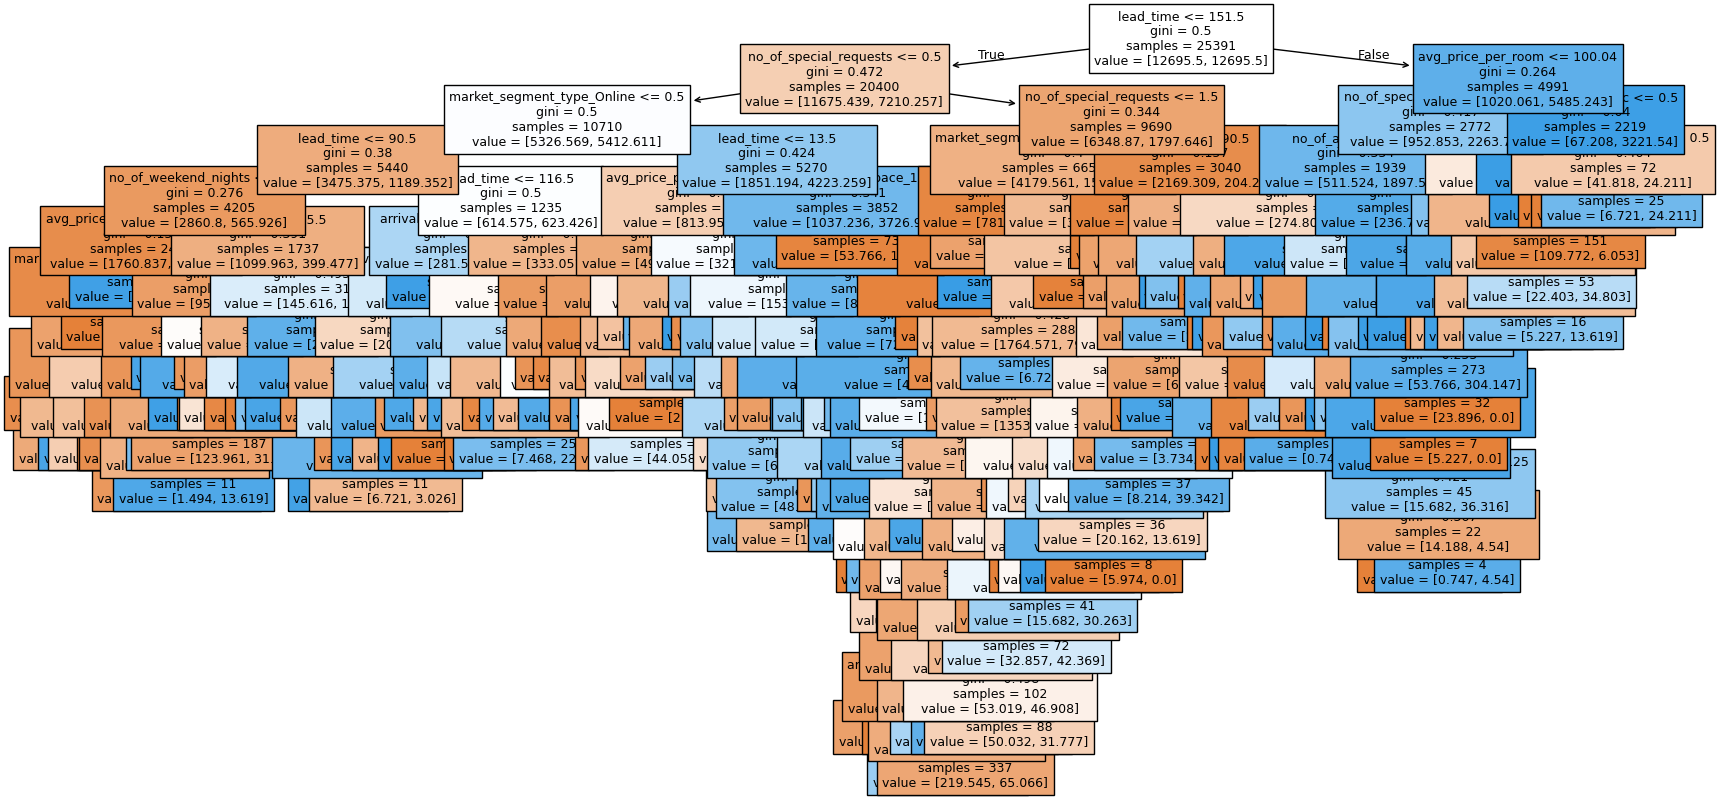

In [ ]:
# Visualisation of the best model
plt.figure(figsize=(20, 10))
feature_names = list(x_train.columns)
out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9
                     ,node_ids=False,class_names=None,)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

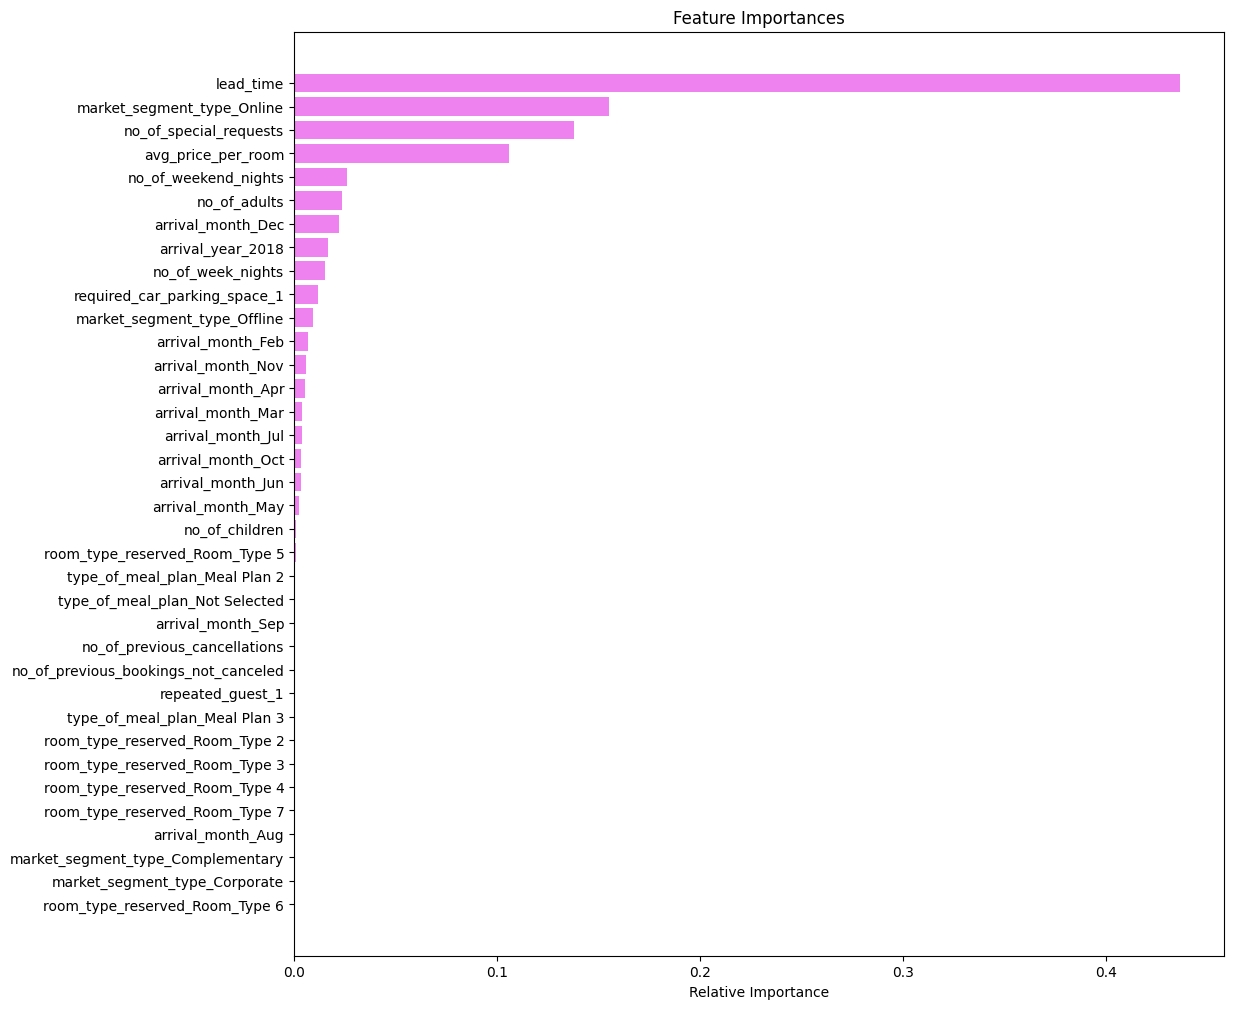

In [ ]:
# Obtaining Importance feature
importances = best_model.feature_importances_
indices = np.argsort(importances)

# Plot of importances of the variables
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important factors that determined whether a client would cancel their booking are:
* Lead time
* Number of special requests
* Online market segment.
* Average price per room
* Arrival time being December
* Requirement for a car parking space.
* Number of weekend nights booked.
* Planned arrival year being 2018.


## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

#### Profitable Policies
* When a client's booking has a lead time greater than 50 days, the client should be contacted with in the 50days from booking to verify whether they actually plan to utilize the room or else the room out to be sold out to another client.
* Clients who have made no special requests should also be later contacted to verify that they still plan to use the room.
* Online clients should be asked to make a down payment on the room.
* A limit should be set for when a cancellation is acceptable and when that limit is violated, the client ought to pay a fine.
* Advertisement can be made to target the Offline market segement given that it has low chances of booking cancellation and pays the thrid highest average price behind Online and Aviation Market segments.
* New Bookings should be analysed using the Final model do predict whether a Client will later cancel their booking or not especially the clients from the Online market segemnt.


#### Other Recommendations
* There is need to standardize the room prices for each month at the means of each month  to reduce the cancellation of bookings by clients because they found a better deal with another hotel
* The highest focus of analysis for potential to cancel their bookings should be on the new clients.
* The hotel needs to increase its repeat guests given that they hardly ever cancel their bookings. This can be done by creating special offers for new clients so that they get to experience the ambiance and envirnoment of the hotel and in future be more willing to book with it.
